In [1]:
import pandas as pd
from tkinter import Tk, filedialog
import ast

In [2]:
# Create Tk root
root = Tk()

# Hide the main window
root.withdraw()

# Set the main window to be always on top
root.call('wm', 'attributes', '.', '-topmost', True)

# Ask user to select CSV files
csv_paths = filedialog.askopenfilename(multiple=True, title='Select CSV files', filetypes=[('CSV files', '*.csv')])

# Initialize a list to store DataFrames for each selected CSV file
data_frames = []

# Iterate over each selected CSV file path
for csv_path in csv_paths:
    df = pd.read_csv(csv_path, sep=';')
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)
combined_df.update(combined_df.applymap(lambda x: x.strip() if isinstance(x, str) else x))

# Now combined_df contains data from all selected CSV files
#print(combined_df)

In [18]:
# Define a list to store all selections and filtering criteria
filtering_criteria = []

print("Available headers:")
for idx, header in enumerate(combined_df.columns):
    print(f"{idx}: {header}")

# Prompt the user to choose a header by its number
header_number = int(input("Enter the number of the header you want to filter by: "))

# Check if the selected header is "array" and ask for input again if it is
while combined_df.columns[header_number] == "array":
    print("Sorry, you cannot select the 'array' column.")
    header_number = int(input("Enter the number of the header you want to filter by: "))

selected_header = combined_df.columns[header_number]

# Append the selected header to filtering_criteria
filtering_criteria.append(f"Selected Header: {selected_header}")

filter_value = input(f"Enter the value to filter by {selected_header}: ")

# Append the filter value to filtering_criteria
filtering_criteria.append(f"Filter Value: {filter_value}")

# Filtering rows based on the selected header and filter value
matching_rows = combined_df[combined_df[selected_header] == filter_value]

# Extracting the headers in the original order from the DataFrame
original_headers = matching_rows.columns.tolist()

print("Matching Rows:")
print(len(matching_rows))

# Display all selections and filtering criteria
print("\nAll Selections and Filtering Criteria:")
for criterion in filtering_criteria:
    print(criterion)



Available headers:
0: Mouse
1: Genotype
2: Date
3: Selected Behavior
4: Sham
5: Session Number
6: Fiber Connection
7: Right Turn Array
8: Right Turn Array Continue
9: Total Right Turn Bout Count
10: Total Right Turn Stim Count
11: Average Duration of Right Turn
12: Total Right Turn Stim in Stim Block
13: Total Right Turn Bouts in Stim Block
14: Right Turn Average Duration in Stim Block
15: Locomotion Array
16: Locomotion Array Continue
17: Total Locomotion Bout Count
18: Total Locomotion Stim Count
19: Average Duration of Locomotion
20: Total Locomotion Stim in Stim Block
21: Total Locomotion Bouts in Stim Block
22: Locomotion Average Duration in Stim Block
23: Face Groom Array
24: Face Groom Array Continue
25: Total Face Groom Bout Count
26: Total Face Groom Stim Count
27: Average Duration of Face Groom
28: Total Face Groom Stim in Stim Block
29: Total Face Groom Bouts in Stim Block
30: Face Groom Average Duration in Stim Block
Enter the number of the header you want to filter by: 1
E

In [19]:
def get_possible_indices(tuples):
    index_to_label = {
        0: "Behavior,0",
        1: "Stim Count,1",
        2: "Frame Rate,2",
        3: "Bouts,3",
        4: "Duration,4", 
        5: "Start Time,5", 
        6: "End Time,6"

    }
    if tuples and isinstance(tuples[0], tuple):
        return [index_to_label[i] if i in index_to_label else f"Unknown Label {i}" for i in range(len(tuples[0]))]
    return []

def get_possible_indices_integers(tuples):
    if tuples and isinstance(tuples[0], tuple):
        return list(range(len(tuples[0])))
    return []

original_matching_rows = matching_rows.copy()

while True:
    start_filtering = input("Do you want to start filtering? (y/n): ")
    if start_filtering.lower() != 'y':
        print("Filtering process cancelled.")
        break
    
    print("\nAvailable headers:")
    for idx, header in enumerate(matching_rows.columns):
        print(f"{idx}: {header}")

    try:
        header_number = int(input("Enter the number of the header you want to filter by: "))
        
        if 0 <= header_number < len(matching_rows.columns):
            selected_header = matching_rows.columns[header_number]
            header_words = selected_header.split()
            filtering_criteria.append(f"Selected Header: {selected_header}")
            print(selected_header)
            
            substring = 'Array'
            if substring in selected_header:
                print(f"The substring '{substring}' was found in the header.")
            else:
                print(f"The substring '{substring}' was not found in the header.")

            if 'Array' in selected_header:
                tuple_cells = matching_rows[selected_header].tolist()
                int_1 = []

                for subli in tuple_cells:
                    intermediate = subli.strip('][').split('][')
                    int_1.append(intermediate)

                tuples_list = [[tuple(float(value) if '.' in value else int(value) for value in s.split(',')) for s in inner_list] for inner_list in int_1]

                possible_indices = get_possible_indices(tuples_list[0])
                print("\nAvailable indices for the elements within tuples:")
                print(possible_indices)
                possible_indices_integers = get_possible_indices_integers(tuples_list[0])
                
                selected_indices_str = input("Enter the indices of the elements within each tuple to filter by (comma-separated): ")
                selected_indices = [int(idx.strip()) for idx in selected_indices_str.split(',')]
                selected_indices_with_range = []
                
                for selected_index in selected_indices:
                    if selected_index == 5 or selected_index == 6:
                        selected_indices_with_range.append(selected_index)
                    elif selected_index in possible_indices_integers:
                        selected_indices_with_range.append(selected_index)
                    else:
                        print(f"Invalid tuple element index {selected_index}. Skipping.")
                # Append selected indices to filtering_criteria
                filtering_criteria.append(f"Selected Indices: {selected_indices_with_range}") 
                
                if 5 in selected_indices_with_range or 6 in selected_indices_with_range:
                    range_filtering = input("Do you want to filter by an exact value or a range for index 5 or 6? (exact/range): ").lower()
                    if range_filtering == 'range':
                        range_min = int(input("Enter the minimum value of the range: "))
                        range_max = int(input("Enter the maximum value of the range: "))
                        # Append selected indices to filtering_criteria
                        filtering_criteria.append(f"Selected Indices: {selected_indices_with_range}")
                        matching_tuples = []
                        for x in tuples_list:
                            for current_tuple in x:
                                value_at_selected_index = current_tuple[selected_index]
                                if range_min <= value_at_selected_index <= range_max:
                                    matching_tuples.append(current_tuple)
                                        
                        if len(matching_tuples) > 0:
                            mask = []
                            for x in tuples_list:
                                found_true_for_tuple = False

                                for current_tuple in x:
                                    value_at_selected_index = current_tuple[selected_index]
                                    if range_min <= value_at_selected_index <= range_max:
                                        mask.append(True)
                                        found_true_for_tuple = True
                                        break

                                if not found_true_for_tuple:
                                    mask.append(False)

                            indices_to_keep = [i for i, value in enumerate(mask) if value]
                            filtered_matching_rows = matching_rows[matching_rows.index.isin(indices_to_keep)]
                            matching_rows = filtered_matching_rows
                            original_matching_rows = matching_rows.copy()
                        else:
                            print("There are no matching tuples and no matching rows")
                            if len(matching_rows) == 0:
                                matching_rows = original_matching_rows.copy()
                                print('Matching Rows Data Frame Updated to Last Successful Filter')

                    else:
                        user_input = input("Enter the value to filter by in the selected element at index 5 or 6 (or 'all' to select all): ")
                        if user_input.lower() == 'all':
                            matching_tuples = []
                            for x in tuples_list:
                                for current_tuple in x:
                                    matching_tuples.append(current_tuple)
                        else:
                            try:
                                user_input = int(user_input)
                                matching_tuples = []
                                for x in tuples_list:
                                    for current_tuple in x:
                                        value_at_selected_index = current_tuple[selected_index]
                                        if value_at_selected_index == user_input:
                                            matching_tuples.append(current_tuple)

                                if len(matching_tuples) > 0:
                                    mask = []
                                    for x in tuples_list:
                                        found_true_for_tuple = False

                                        for current_tuple in x:
                                            value_at_selected_index = current_tuple[selected_index]
                                            if value_at_selected_index == user_input:
                                                mask.append(True)
                                                found_true_for_tuple = True
                                                break

                                        if not found_true_for_tuple:
                                            mask.append(False)

                                    indices_to_keep = [i for i, value in enumerate(mask) if value]
                                    filtered_matching_rows = matching_rows[matching_rows.index.isin(indices_to_keep)]
                                    matching_rows = filtered_matching_rows
                                    original_matching_rows = matching_rows.copy()
                                    print('Matching Rows Data Frame and Original Copy Data Frame Are Updated')
                                else:
                                    print("There are no matching tuples and no matching rows")
                                    if len(matching_rows) == 0:
                                        matching_rows = original_matching_rows.copy()
                                        print('Matching Rows Data Frame Replaced with Last Successful Filter')

                            except ValueError:
                                print(f"Invalid input for index 5 or 6. Please enter a valid value of the expected data type.")

                else:
                    for selected_index in selected_indices_with_range:
                        if selected_index != 5 or selected_index != 6:
                            example_tuple = tuples_list[0]
                            for x in example_tuple[:7]:
                                print("Examples Tuples:", x)

                            values = set()
                            for x in tuples_list:
                                for y in x:
                                    if len(y) > selected_index:
                                        values.add(y[selected_index])
                            print(f"\nPreview of possible values for the selected element at index {selected_index}:")
                            print(values)
                            
                            user_input = input(f"Enter the value to filter by in the selected element at index {selected_index} (or 'all' to select all): ")

                            if user_input.lower() == 'all':
                                matching_tuples = []
                                for x in tuples_list:
                                    for current_tuple in x:
                                        matching_tuples.append(current_tuple)
                            else:
                                try:
                                    user_input = int(user_input)
                                    matching_tuples = []
                                    for x in tuples_list:
                                        for current_tuple in x:
                                            value_at_selected_index = current_tuple[selected_index]
                                            if value_at_selected_index == user_input:
                                                matching_tuples.append(current_tuple)

                                    if len(matching_tuples) > 0:
                                        mask = []
                                        for x in tuples_list:
                                            found_true_for_tuple = False

                                            for current_tuple in x:
                                                value_at_selected_index = current_tuple[selected_index]
                                                if value_at_selected_index == user_input:
                                                    mask.append(True)
                                                    found_true_for_tuple = True
                                                    break

                                            if not found_true_for_tuple:
                                                mask.append(False)

                                        indices_to_keep = [i for i, value in enumerate(mask) if value]
                                        filtered_matching_rows = matching_rows[matching_rows.index.isin(indices_to_keep)]
                                        matching_rows = filtered_matching_rows
                                        original_matching_rows = matching_rows.copy()
                                    else:
                                        print("There are no matching tuples and no matching rows")
                                        if len(matching_rows) == 0:
                                            matching_rows = original_matching_rows.copy()
                                            print('Matching Rows Data Frame Updated to Last Successful Filter')

                                except ValueError:
                                    print(f"Invalid input for index {selected_index}. Please enter a valid value of the expected data type.")
            else:
                possible_values = matching_rows[selected_header].unique()
                print(f"Unique possible values for {selected_header}:")
                for value in possible_values:
                    print(value)

                filter_value = input(f"Enter the value to filter by {selected_header} (or 'all' to select all values): ")

                if filter_value.lower() == 'all':
                    # No need to filter, include all values
                    original_matching_rows = matching_rows.copy()
                else:
                    filtering_criteria.append(f"Filter Value: {filter_value}")

                    selected_value_type = type(matching_rows[selected_header].iloc[0])
                    try:
                        converted_user_input = selected_value_type(filter_value)
                        matching_rows = matching_rows[matching_rows[selected_header] == converted_user_input]

                        if len(matching_rows) == 0:
                            print("No matches found.")
                            matching_rows = original_matching_rows.copy()
                        else:
                            original_matching_rows = matching_rows.copy()
                    except ValueError:
                        print("Invalid input. Please enter a valid value of the expected data type.")

            continue_input = input("Do you want to continue? (y/n): ")
            if continue_input.lower() == 'n':
                break
        else:
            print("Invalid header number. Please enter a valid number.")
    except ValueError as e:
        print("An error occurred:", e)
        
filtering_criteria.append(f"Matching Rows Count: {len(matching_rows)}")
                     
# Display all selections and filtering criteria
print("\nAll Selections and Filtering Criteria:")
for criterion in filtering_criteria:
    print(criterion)

Do you want to start filtering? (y/n): y

Available headers:
0: Mouse
1: Genotype
2: Date
3: Selected Behavior
4: Sham
5: Session Number
6: Fiber Connection
7: Right Turn Array
8: Right Turn Array Continue
9: Total Right Turn Bout Count
10: Total Right Turn Stim Count
11: Average Duration of Right Turn
12: Total Right Turn Stim in Stim Block
13: Total Right Turn Bouts in Stim Block
14: Right Turn Average Duration in Stim Block
15: Locomotion Array
16: Locomotion Array Continue
17: Total Locomotion Bout Count
18: Total Locomotion Stim Count
19: Average Duration of Locomotion
20: Total Locomotion Stim in Stim Block
21: Total Locomotion Bouts in Stim Block
22: Locomotion Average Duration in Stim Block
23: Face Groom Array
24: Face Groom Array Continue
25: Total Face Groom Bout Count
26: Total Face Groom Stim Count
27: Average Duration of Face Groom
28: Total Face Groom Stim in Stim Block
29: Total Face Groom Bouts in Stim Block
30: Face Groom Average Duration in Stim Block
Enter the numbe

In [20]:
print(len(matching_rows))
print(len(matching_tuples))

6
3051


In [21]:
print(matching_rows)
print(matching_tuples)

   Mouse Genotype   Date Selected Behavior Sham  Session Number  \
6   AD10       D1  61523        Right Turn    n               1   
7   AD10       D1  72423        Right Turn    n               2   
20  AD11       D1  51123        Right Turn    n               1   
21  AD11       D1  72023        Right Turn    n               2   
52   P22       D1  52423        Right Turn    n               1   
53   P22       D1  72023        Right Turn    n               2   

   Fiber Connection                                   Right Turn Array  \
6         Bilateral  [1,2,18,3,6,503.01,509][1,2,15,7,5,903.01,908]...   
7         Bilateral  [1,2,18,5,6,324.03,330][1,2,15,7,5,360.01,365]...   
20        Bilateral  [1,1,9,2,3,102.01,105][1,1,9,4,3,149.01,152][1...   
21        Bilateral  [1,1,12,1,4,226.01,230][1,2,15,2,5,543.01,548]...   
52        Bilateral  [1,1,12,4,4,553.01,557][1,2,18,8,6,607.03,613]...   
53        Bilateral  [1,2,18,1,6,8.01,14][1,2,15,3,5,238.01,243][1,...   

    Right T

In [23]:
for criterion in filtering_criteria:
    print(criterion)

Selected Header: Genotype
Filter Value: D1
Selected Header: Selected Behavior
Filter Value: Right Turn
Selected Header: Fiber Connection
Filter Value: Bilateral
Selected Header: Sham
Filter Value: n
Selected Header: Total Right Turn Stim Count
Matching Rows Count: 6


In [80]:
headers = []
values = []
duration = {}
total_duration = {}
behavior_index= None
sequence_found = False

for i, criterion in enumerate(filtering_criteria):
    # Check if the row is an even row (0-based index)
    if i % 2 == 0:
        # Split the criterion string by ":"
        parts = criterion.split(":", 1)
        
        # Check if there are at least two parts
        if len(parts) == 2:
            # Extract the selected header from even rows
            header = parts[1].strip()
            headers.append(header)
    else:
        # Odd rows are values, split by semicolon
        parts = criterion.split(":", 1)
        if len(parts) == 2:
            # Extract the second part and append to values
            value = parts[1].strip()
            values.append(value)
#print("Headers:")
#print(headers)

#print("Values:")
#print(values)

for index,header in enumerate(headers):
    keyword="Selected Behavior"
    if keyword in header:
        behavior_index= index
for index, value in enumerate(value):
    if 0 <= behavior_index < len(values):
        # Get the value at the behavior_index
        selected_value = values[behavior_index]
        print(f"Value at {keyword}: {selected_value}")
    else:
        print("Behavior index is out of range")

# Initialize empty lists for Stim Count and Bout Count
stim_count_values = []
bout_count_values = []

# Define the expected column names
expected_column_name_bout = f"Total {selected_value} Bout Count"

if expected_column_name_bout in matching_rows.columns:
    # Extract values from the Bout Count and append to bout_count_values list
    bout_count_values = matching_rows[expected_column_name_bout].tolist()
    bout_mean= round((sum(bout_count_values)/len(bout_count_values)),2)
    


# Output results
if selected_value:
    print(f"Behavior: {selected_value}")
else:
    print("Behavior not found")

if stim_count_values:
    print(f"Stim Count Values: {stim_count_values}")
else:
    print(f"No values found for '{expected_column_name_stim}'")

if bout_count_values:
    print(f"Bout Count Values: {bout_count_values}")
else:
    print(f"No values found for '{expected_column_name_bout}'")
    
print(f"Bout Mean: {bout_mean}")


Value at Selected Behavior: Right Turn
Row Index 0: Total Duration = 6
Row Index 1: Total Duration = 5
Row Index 2: Total Duration = 4
Row Index 3: Total Duration = 3
Row Index 4: Total Duration = 4
Row Index 5: Total Duration = 4
Row Index 6: Total Duration = 3
Row Index 7: Total Duration = 4
Row Index 8: Total Duration = 6
Row Index 9: Total Duration = 3
Row Index 10: Total Duration = 6
Row Index 11: Total Duration = 3
Row Index 12: Total Duration = 3
Row Index 13: Total Duration = 3
Row Index 14: Total Duration = 4
Row Index 15: Total Duration = 3
Row Index 16: Total Duration = 3
Row Index 17: Total Duration = 4
Row Index 18: Total Duration = 3
Row Index 19: Total Duration = 4
Row Index 20: Total Duration = 3
Row Index 21: Total Duration = 3
Row Index 22: Total Duration = 3
Row Index 23: Total Duration = 3
Row Index 24: Total Duration = 3
Row Index 25: Total Duration = 3
Row Index 26: Total Duration = 4
Row Index 27: Total Duration = 4
Row Index 28: Total Duration = 7
Row Index 29: 

Row Index 2605: Total Duration = 3
Row Index 2606: Total Duration = 3
Row Index 2607: Total Duration = 4
Row Index 2608: Total Duration = 5
Row Index 2609: Total Duration = 3
Row Index 2610: Total Duration = 5
Row Index 2611: Total Duration = 3
Row Index 2612: Total Duration = 7
Row Index 2613: Total Duration = 3
Row Index 2614: Total Duration = 4
Row Index 2615: Total Duration = 5
Row Index 2616: Total Duration = 3
Row Index 2617: Total Duration = 3
Row Index 2618: Total Duration = 5
Row Index 2619: Total Duration = 5
Row Index 2620: Total Duration = 4
Row Index 2621: Total Duration = 7
Row Index 2622: Total Duration = 3
Row Index 2623: Total Duration = 4
Row Index 2624: Total Duration = 4
Row Index 2625: Total Duration = 3
Row Index 2626: Total Duration = 3
Row Index 2627: Total Duration = 3
Row Index 2628: Total Duration = 6
Row Index 2629: Total Duration = 4
Row Index 2630: Total Duration = 3
Row Index 2631: Total Duration = 3
Row Index 2632: Total Duration = 3
Row Index 2633: Tota

Row Index 2170: Total Duration 4
Row Index 2171: Total Duration 3
Row Index 2172: Total Duration 3
Row Index 2173: Total Duration 3
Row Index 2174: Total Duration 3
Row Index 2175: Total Duration 3
Row Index 2176: Total Duration 3
Row Index 2177: Total Duration 3
Row Index 2178: Total Duration 3
Row Index 2179: Total Duration 4
Row Index 2180: Total Duration 5
Row Index 2181: Total Duration 3
Row Index 2182: Total Duration 6
Row Index 2183: Total Duration 5
Row Index 2184: Total Duration 4
Row Index 2185: Total Duration 3
Row Index 2186: Total Duration 5
Row Index 2187: Total Duration 4
Row Index 2188: Total Duration 4
Row Index 2189: Total Duration 3
Row Index 2190: Total Duration 4
Row Index 2191: Total Duration 4
Row Index 2192: Total Duration 3
Row Index 2193: Total Duration 5
Row Index 2194: Total Duration 6
Row Index 2195: Total Duration 8
Row Index 2196: Total Duration 3
Row Index 2197: Total Duration 3
Row Index 2198: Total Duration 4
Row Index 2199: Total Duration 5
Row Index 

In [14]:
# Assuming you have the matching_tuples list from the filtering process
# matching_tuples = []

stim_count = []  # Initialize the stim_count list
bout_counts = []  # Initialize the bout_counts list
duration = []
bout_start_time = []
bout_end_time=[]

for matching_tuple in matching_tuples: 
    if matching_tuple[1]:
        stim_count.append(matching_tuple[1])
    if matching_tuple[3]:
        bout_counts.append(matching_tuple[3])
    if matching_tuple[4]:
        duration.append(matching_tuple[4])
    if matching_tuple[5]:
        bout_start_time.append(matching_tuple[5])
    if matching_tuple[6]:
        bout_end_time.append(matching_tuple[6])

#Averages

avg_stim_count=round((sum(stim_count))/(len(stim_count)))
avg_bout_number=round((sum(bout_counts))/(len(bout_counts)))
avg_duration=((sum(duration))/(len(duration)))
avg_bout_start_time=round((sum(bout_start_time))/(len(bout_start_time)),2)
avg_bout_end_time=round((sum(bout_end_time))/(len(bout_end_time)),2)
print('These are the averages of all the matching tuples:')
print('Average Stim Count:',avg_stim_count)
print('Average Bout Number:',avg_bout_number)
print('Average Duration:',avg_duration)
print('Average Start Time:',avg_bout_start_time)
print('Average End Time:',avg_bout_end_time)

These are the averages of all the matching tuples:
Average Stim Count: 1
Average Bout Number: 409
Average Duration: 4.020648967551622
Average Start Time: 17598.16
Average End Time: 17602.17


Selected Index Name: Bouts, Population Size (N): 3019, Population Average: 381.08479629016233, Population Std Deviation: 223.4275102059182
Do you want to graph the selected index with per minute with a specific bin lengths? (yes/no): yes
Enter the bin width in minutes: 5
    Start Time  End Time     Sum  Count  Count/Min       SEM
0          0.0       5.0   16573    358       71.6  0.210214
1          5.0      10.0   44598    323       64.6  0.210214
2         10.0      15.0   46746    225       45.0  0.210214
3         15.0      20.0   55968    214       42.8  0.210214
4         20.0      25.0   77569    245       49.0  0.210214
5         25.0      30.0   88724    230       46.0  0.210214
6         30.0      35.0  106362    255       51.0  0.210214
7         35.0      40.0  106047    220       44.0  0.210214
8         40.0      45.0  103960    190       38.0  0.210214
9         45.0      50.0  147570    244       48.8  0.210214
10        50.0      55.0  130563    199       39.8  0.210

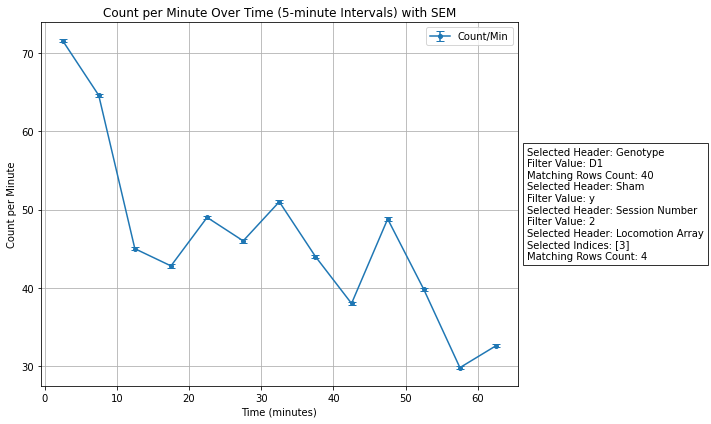

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'matching_tuples' contains the selected tuples
# and 'time_values' contains the corresponding time values

# Define the selected indices for start and end time
start_time_index = 5
end_time_index = 6

# Define a dictionary to map index values to names
index_name_mapping = {
    0: 'Behavior',
    1: 'Stim Count',
    2: 'Frame Rate',
    3: 'Bouts',
    4: 'Duration',
    5: 'Start Time',
    6: 'End Time'
}

# Extract the name associated with the selected index
selected_index_name = index_name_mapping[selected_index]

selected_values = [tuple[selected_index] for tuple in matching_tuples]

# Extract the start and end times from matching_tuples and convert to minutes
start_times = [tuple[start_time_index] / 600 for tuple in matching_tuples]
end_times = [tuple[end_time_index] / 600 for tuple in matching_tuples]

# Define the bin width in minutes
bin_width_minutes = 5  # Adjust the bin width as needed

# Calculate the minimum and maximum times
min_time = 0
max_time = 65

# Create time bins
time_bins = np.arange(min_time, max_time + bin_width_minutes, bin_width_minutes)

# Initialize lists to store mean values and SEM
mean_values = []
sem_values = []

# Population size (N) is the total number of data points in your entire dataset
N = len(matching_tuples)

# Calculate the population average and standard deviation for the entire dataset
population_average = np.mean(selected_values)
population_std = np.std(selected_values, ddof=1)

# Print the population information as a single line with the selected index name
print(f"Selected Index Name: {selected_index_name}, Population Size (N): {N}, Population Average: {population_average}, Population Std Deviation: {population_std}")

# Integrate the new functionality to prompt the user for binning
user_choice = input("Do you want to graph the selected index with per minute with a specific bin lengths? (yes/no): ")

if user_choice.lower() == "yes":
    # Define the selected bin width in minutes
    bin_width_minutes = float(input("Enter the bin width in minutes: "))
    
    # Create time bins without overlap
    time_bins = np.arange(min(start_times), max(end_times) + bin_width_minutes, bin_width_minutes)

    # Initialize lists to store sum values, counts, start times, end times, and count per minute
    sum_values = []
    counts = []
    start_times_bin = []
    end_times_bin = []
    count_per_minute = []

    # Iterate through the time bins
    for bin_start, bin_end in zip(time_bins[:-1], time_bins[1:]):
        bin_values = []

        # Iterate through the data to collect values within this bin
        for start_time, end_time, value in zip(start_times, end_times, selected_values):
            if start_time > bin_start and end_time <= bin_end:
                # Data falls within this bin
                bin_values.append(value)

        # Calculate the sum of values within the bin
        bin_sum = sum(bin_values)

        # Calculate the count of elements within the bin
        bin_count = len(bin_values)

        # Calculate the count per minute within the bin
        count_per_minute_bin = bin_count / bin_width_minutes

        # Append values to respective lists
        sum_values.append(bin_sum)
        counts.append(bin_count)
        start_times_bin.append(bin_start)
        end_times_bin.append(bin_end)
        count_per_minute.append(count_per_minute_bin)

    # Calculate SEM for count per minute
    sem_values = [np.std(count_per_minute, ddof=1) / np.sqrt(N) if count > 0 else 0 for count in counts]

    # Calculate the middle of each bin
    middle_of_bins = [start + bin_width_minutes / 2 for start in start_times_bin]

    # Create a DataFrame to store the bin statistics
    result_df = pd.DataFrame({
        'Start Time': start_times_bin,
        'End Time': end_times_bin,
        'Sum': sum_values,
        'Count': counts,
        'Count/Min': count_per_minute,
        'SEM': sem_values
    })

    # Display the DataFrame
    print(result_df)

    # Create a plot of counts per minute against the middle of time bins with error bars representing SEM
    plt.figure(figsize=(10, 6))
    plt.errorbar(middle_of_bins, count_per_minute, yerr=sem_values, marker='o', markersize=4, capsize=4, label='Count/Min')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Count per Minute')
    plt.title('Count per Minute Over Time (5-minute Intervals) with SEM')
    plt.grid(True)
    plt.legend()
    
    # Add a text box with filtering criteria to the far right
    text_box_content = "\n".join(filtering_criteria)
    plt.gca().text(1.02, 0.5, text_box_content, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8),
                    verticalalignment='center', fontsize=10)

    plt.tight_layout()  # Ensures that the text box does not interfere with other elements
    plt.show()
else:
    # Iterate through the time bins
    for bin_start, bin_end in zip(time_bins[:-1], time_bins[1:]):
       # Calculate the mean value and SEM for tuples within the current time bin
        values_in_bin = [
            selected_values[i] for i, (start_time, end_time) in enumerate(zip(start_times, end_times))
            if (start_time > bin_start and end_time <= bin_end)  # No overlap
        ]

        if values_in_bin:
            mean_value = np.mean(values_in_bin)
            sem_value = np.std(selected_values, ddof=1) / np.sqrt(N)  # Use the population size (N) for SEM calculation

            # Append mean and SEM values to respective lists
            mean_values.append(mean_value)
            sem_values.append(sem_value)
        else:
            mean_values.append(0)  # No values in the bin
            sem_values.append(0)   # No values, SEM is 0
    # Create a DataFrame to store the time bins, mean values, and SEM values
    result_df = pd.DataFrame({'Time Bin (Start)': time_bins[:-1], 'Time Bin (End)': time_bins[1:], 'Mean Value': mean_values, 'SEM': sem_values})

    # Display the DataFrame
    print(result_df)

    # Create a plot with error bars representing SEM
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.errorbar(time_bins[:-1], mean_values, yerr=sem_values, fmt='o-', markersize=4, capsize=4, label=f'{selected_index_name}')
    plt.xlabel('Time (minutes)')
    plt.ylabel(f'Mean Value of {selected_index_name}')
    plt.title(f'Mean Value of {selected_index_name} Over Time ({bin_width_minutes}-minute Intervals) with SEM')
    plt.grid(True)
    plt.legend()

    # Add a text box with filtering criteria to the far right
    text_box_content = "\n".join(filtering_criteria)
    plt.gca().text(1.02, 0.5, text_box_content, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8),
                    verticalalignment='center', fontsize=10)

    plt.tight_layout()  # Ensures that the text box does not interfere with other elements
    plt.show()

# DONT NOT USE

In [ ]:
fps is 30  1 behavior is 1/30

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_possible_indices(tuples):
    if tuples and isinstance(tuples[0], tuple):
        return range(len(tuples[0]))
    return []

while True:
    start_filtering = input("Do you want to start filtering? (y/n): ")
    if start_filtering.lower() != 'y':
        print("Filtering process cancelled.")
        break

    array_columns = [col for col in matching_rows.columns if "array" in col.lower()]

    print("Available columns with 'array' in their names:")
    for idx, col in enumerate(array_columns):
        print(f"{idx}: {col}")

    selected_column_index = int(input("Enter the number of the column you want to use for values: "))
    selected_column_name = array_columns[selected_column_index]

    if "array" in selected_column_name.lower():
        tuple_cells = matching_rows[selected_column_name].tolist()

        possible_indices = get_possible_indices(ast.literal_eval(tuple_cells[0]))
        print("\nAvailable indices for the elements within tuples:")
        print(possible_indices)

        selected_index = int(input("Enter the index of the element you want to plot: "))

        if selected_index == 3:
            print("Index 3 represents time, please select a different index.")
        elif selected_index==2:
            generate_duration_plot = input("Do you want to generate a duration plot? (y/n): ")
            if generate_duration_plot.lower() == 'y':
                plt.figure()

                durations = []
                max_y_length = 0
                
                for cell in tuple_cells:
                    tuple_data = ast.literal_eval(cell)
                    if len(tuple_data) > selected_index and len(tuple_data) > 4:
                        y_values = [x[selected_index] for x in tuple_data]

                        if len(y_values) > max_y_length:
                            max_y_length = len(y_values)

                        durations.append(((tuple_data[-1][3] - tuple_data[0][1]) / 10))  # Calculate duration

                x_values = list(range(1, max_y_length + 1))
                avg_durations = np.zeros(max_y_length)

                for duration in durations:
                    for i in range(len(x_values)):
                        if i < len(duration):
                            avg_durations[i] += duration[i]

                avg_durations /= len(durations)

                plt.plot(x_values, avg_durations, label='Average Duration')
                plt.xlabel('Index position')
                plt.ylabel('Average Duration (seconds)')
                plt.title(f'Average Duration Plot for Index {selected_index}')
                plt.grid(False)
                plt.legend()
                plt.show()

    continue_input = input("Do you want to continue? (y/n): ")
    if continue_input.lower() == 'n':
        break


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bin_data(x_values, selected_index):
    # Bin the data based on x values
    bin_start = 0
    bin_increment = 300
    bins = np.arange(bin_start, max(x_values) + bin_increment, bin_increment)

    # Create a histogram
    hist, bin_edges = np.histogram(x_values, bins=bins)

    return hist, bin_edges

if x_values and y_values:
    # Call the binning function
    hist, bin_edges = bin_data(x_values, selected_index)
    print(selected_index)
    # Display the histogram
    plt.figure()
    plt.hist(x_values, bins=bin_edges, alpha=0.7)
    plt.xlabel(f'Value at Index {selected_index}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Values at Index {selected_index}')
    plt.grid()

    plt.show()
else:
    print(f"No valid data found for plotting.")
   
# Print the values for each bin
for i, value in enumerate(hist):
    bin_center = (bin_edges[i] + bin_edges[i + 1]) / 2
    print(f"Bin {i+1}: Range {bin_edges[i]} - {bin_edges[i+1]}, Value: {bin_center}, Frequency: {value}")

plt.show()



In [ ]:
mean and sem 

In [ ]:
add index for individual tuples

In [ ]:
AD6 on a given day what is the first 

In [ ]:
## mask = []

for i, x in enumerate(tuples_list):
    found_true_for_index = False   # Reset the flag for each new row 'x'
    
    # Check if 'tup' is present in the current row 'x'
    if tup in x:
        if len(tup) > selected_index:
            # Extract the value at 'selected_index'
            value_at_selected_index = x[selected_index]
            if range_min <= value_at_selected_index <= range_max:
                mask.append(True)       # Append True to the mask
                found_true_for_index = True  # Set flag to True for this index
            else:
                mask.append(False)
        else:
            mask.append(False)
    else:
        mask.append(False)

    # Skip the rest of 'tup' once a True value is found for this index
    if found_true_for_index:
        break


In [ ]:
### Find columns with "array" in their names
array_columns = [col for col in matching_rows.columns if "array" in col.lower()]
print("Available columns with 'array' in their names:")
for idx, col in enumerate(array_columns):
    print(f"{idx}: {col}")

# Prompt user to select a column
selected_column_index = int(input("Enter the number of the column you want to use for values: "))
selected_column_name = array_columns[selected_column_index]

# Define the mapping of tuple indices to column names
tuple_index_to_column = {
    0: 'behavior',
    1: 'duration/count',
    2: 'bout',
    3: 'time (deciseconds)'
}

for idx, col_name in tuple_index_to_column.items():
    new_column_name = f"{selected_column_name}_{col_name}"
    matching_rows.loc[:, new_column_name] = None  # Add new column with None values

# Iterate through each row
for index, row in matching_rows.iterrows():
    array_data_str = row[selected_column_name]
    # Check if the content is a valid list
    try:
        array_data = ast.literal_eval(array_data_str)
        if not isinstance(array_data, list):
            continue  # Skip this row if array_data is not a list
    except (SyntaxError, ValueError, IndexError):
        print(f'Error occurred while processing array_data in row {index}: {array_data_str}')
        continue  # Skip this row if literal_eval encounters an error
    
    print(f"Extracted array_data for row {index}: {array_data}")  # Print the array_data
    
    # Process the list of tuples
    for tuple_elements in array_data:
        try:
            if not isinstance(tuple_elements, tuple):
                print("Error: This is not a tuple:", tuple_elements)
                continue
                
            processed_tuple = (float(tuple_elements[0]),) + tuple(map(int, tuple_elements[1:]))
                
            # Extract and update columns as before
            for idx, element in enumerate(processed_tuple):
                column_name = tuple_index_to_column.get(idx)
                if column_name:
                    new_column_name = f"{selected_column_name}_{column_name}"
                    if matching_rows.at[index, new_column_name] is None:
                        matching_rows.at[index, new_column_name] = []  # Initialize with empty list
                    matching_rows.at[index, new_column_name].append(element)
        except (ValueError):
            print("A value error occurred while processing tuple_elements:", tuple_elements)
        except (SyntaxError):
            print("A syntax error occurred while processing tuple_elements:", tuple_elements)

# Display the resulting DataFrame
print(matching_rows)

In [ ]:
# Create a list of newly added column names
newly_added_columns = [f"{selected_column_name}_{col_name}" for col_name in tuple_index_to_column.values()]

# Prompt user to select a column for binning
print("Available columns for binning:")
for idx, col_name in enumerate(newly_added_columns):
    print(f"{idx}: {col_name}")

selected_binning_column_index = int(input("Enter the number of the column you want to use for bins: "))

if 0 <= selected_binning_column_index < len(newly_added_columns):
    selected_binning_column_name = newly_added_columns[selected_binning_column_index]

    # Create a dictionary to store values for each row
    values_dict = {}

    # Create a dictionary to store time values for each row
    time_dictionary = {}

    for idx, row in matching_rows.iterrows():
        # Get the value of the selected column for the current row
        value = row[selected_binning_column_name]

        # Add the value to the values_dict for the current row
        values_dict[idx] = value

        # Get the time value for the current row
        time_column = [col for col in row.index if "time (deciseconds)" in col.lower()]
        if time_column:
            time_value = row[time_column[0]]
            time_dictionary[idx] = time_value

    # Display the resulting dictionaries
    print("Values Dictionary:")
    for row_index, value in values_dict.items():
        print(f"Row {row_index}: {value}")

    print("\nTime Dictionary:")
    for row_index, time_value in time_dictionary.items():
        print(f"Row {row_index}: {time_value}")
else:
    print("Invalid selection. Please choose a valid index.")



In [ ]:
# Iterate through values in the values_dict dictionary and retrieve corresponding time values
print("Values and Time Dictionary Values:")
for row_index, value in values_dict.items():
    time_value = time_dictionary.get(row_index)  # Retrieve time value using the same key
    print(f"Row {row_index}: Value: {value}, Time Value: {time_value}")



In [ ]:
3000,6000,9000,12000,15000,18000,21000,24000,27000,30000,31000,34000,39000,42000]

In [ ]:
output_path = input("Enter the full path of the directory where you want to save the CSV file: ")
output_filename = input("Enter the name of the CSV file to save the filtered data: ")
output_file_path = f"{output_path}/{output_filename}"

matching_rows.to_csv(output_file_path, index=False)

print(f"Filtered data has been saved to {output_file_path}.")

In [17]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_possible_indices(tuples):
    index_to_label = {
        0: "Behavior,0",
        1: "Stim Count,1",
        2: "Frame Rate,2",
        3: "Bouts,3",
        4: "Duration,4", 
        5: "Start Time,5", 
        6: "End Time,6"

    }
    if tuples and isinstance(tuples[0], tuple):
        return [index_to_label[i] if i in index_to_label else f"Unknown Label {i}" for i in range(len(tuples[0]))]
    return []

while True:
    start_filtering = input("Do you want to start filtering? (y/n): ")
    if start_filtering.lower() != 'y':
        print("Filtering process cancelled.")
        break

    array_columns = [col for col in matching_rows.columns if "array" in col.lower()]

    print("Available columns with 'array' in their names:")
    for idx, col in enumerate(array_columns):
        print(f"{idx}: {col}")

    selected_column_index = int(input("Enter the number of the column you want to use for values: "))
    selected_column_name = array_columns[selected_column_index]

    if "array" in selected_column_name.lower():
        tuple_cells = matching_rows[selected_column_name].tolist()

        possible_indices = get_possible_indices(tuple_cells[0])
        print("\nAvailable indices for the elements within tuples:")
        print(possible_indices)

        selected_index = int(input("Enter the index of the element you want to plot: "))
        
        if selected_index == 3:
            print("Index 3 represents time, please select a different index.")
        elif selected_index in possible_indices:
            plt.figure()

            for cell in tuple_cells:
                x_values = []
                y_values = []

                tuple_data = ast.literal_eval(cell)
                if len(tuple_data) > selected_index and len(tuple_data) > 7:
                    for x in tuple_data:
                        x_values.append(((x[3]-x[1])/10))  # Time at index 4
                        y_values.append(x[selected_index])  # Convert y value to minutes

                    if x_values and y_values:
                        title = 'Bouts' if selected_index == 2 else 'Counts'
                        plt.plot(x_values, y_values, label=f'Row {tuple_cells.index(cell) + 1}')
            
            plt.xlabel('Time (seconds)')
            plt.ylabel(f'Value at Index {selected_index} (in minutes)')
            plt.title(f'Combined Line Plot: Index {selected_index} vs. Time (Index 4) - {title}')
            plt.grid(False)
            plt.legend()
            plt.show()

    continue_input = input("Do you want to continue? (y/n): ")
    if continue_input.lower() == 'n':
        break


Do you want to start filtering? (y/n): y
Available columns with 'array' in their names:
0: Right Turn Array
1: Right Turn Array Continue
2: Locomotion Array
3: Locomotion Array Continue
4: Face Groom Array
5: Face Groom Array Continue
Enter the number of the column you want to use for values: 0

Available indices for the elements within tuples:
[]
Enter the index of the element you want to plot: 5
Do you want to continue? (y/n): n
